In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import warnings
warnings.filterwarnings('ignore')

#### Let's load and inspect data

In [2]:
data = pd.read_csv('diabetes2.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape 

(768, 9)

In [5]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### We observe that min value of some columns is 0 which cannot be possible medically.Hence in the data cleaning process we'll have to replace them with median/mean value depending on the distribution. Also in the max column we can see insulin levels as high as 846! We have to treat outliers.

In [8]:
data=data.drop_duplicates()

In [9]:
data.isnull().sum() 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
print(data[data['BloodPressure']==0].shape[0])
print(data[data['Glucose']==0].shape[0])
print(data[data['SkinThickness']==0].shape[0])
print(data[data['Insulin']==0].shape[0])
print(data[data['BMI']==0].shape[0])

35
5
227
374
11


#### Some of the columns have a skewed distribution, so the mean is more affected by outliers than the median. Glucose and Blood Pressure have normal distributions hence we replace 0 values in those columns by mean value. SkinThickness, Insulin,BMI have skewed distributions hence median is a better choice as it is less affected by outliers.

In [11]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())#normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())#normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median())#skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median())#skewed distribution
data['BMI']=data['BMI'].replace(0,data['BMI'].median())#skewed distribution

#### Let's Visualize the data

### Distribution of ages

Here, it is observed that most patients have the age of 20 - 30 years.
Thus, it can be said that adults having age in the range of 20-30 years are more prone to diabetes due to lack of exercise, unhealthy diet, etc.

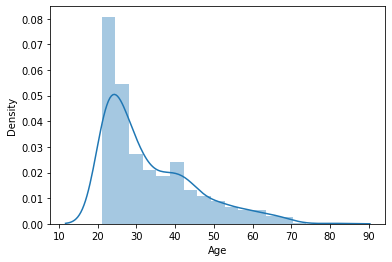

In [12]:
sns.distplot(data['Age'].dropna());

### Blood Sugar Levels vs Age

 The below distribution plot clearly depicts that most patients lie in the range of 20-30 years with blood sugar levels being approximately equal to 100 mg/dL.
Normal sugar levels lie in the range of 60 - 90 mg/dL. 

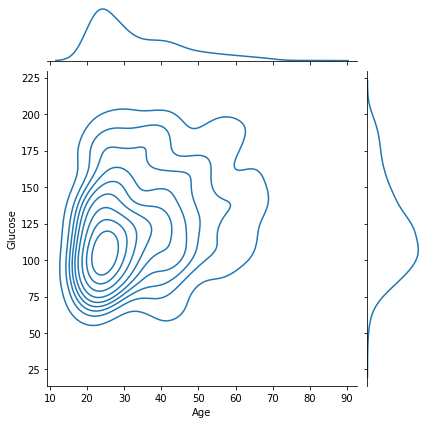

In [13]:
sns.jointplot(data = data, x = 'Age', y = 'Glucose', kind = 'kde');

### BMI vs Age

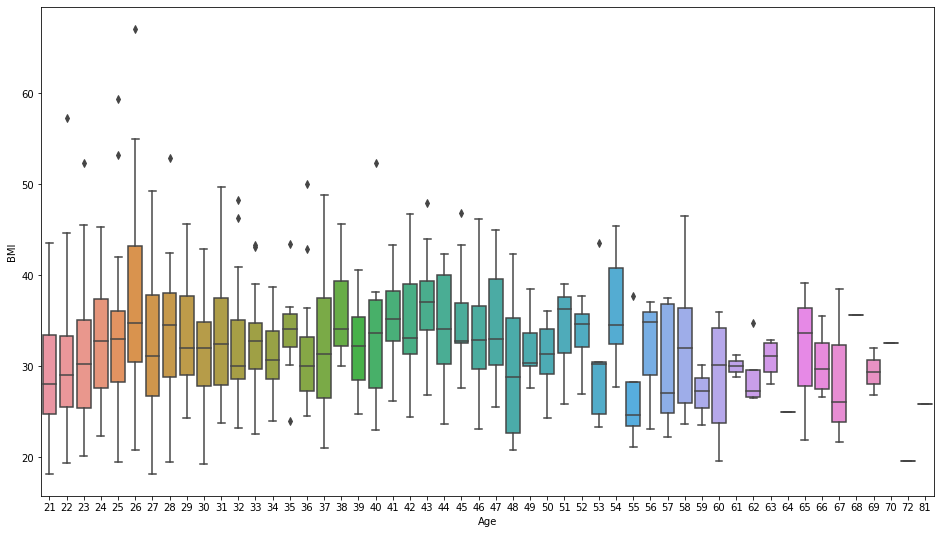

In [14]:
plt.figure(figsize=(16,9))
sns.boxplot(x = 'Age', y = 'BMI', data = data);

### Let's plot relationship of Outcome with the dataset

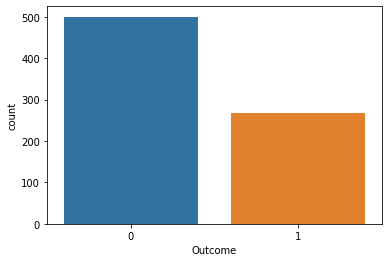

In [15]:
sns.countplot(x = 'Outcome', data = data);

#### We observe that number of people who do not have diabetes is far more than people who do which indicates that our data is imbalanced.

### Let's pairwise plot relationship of the dataset¶

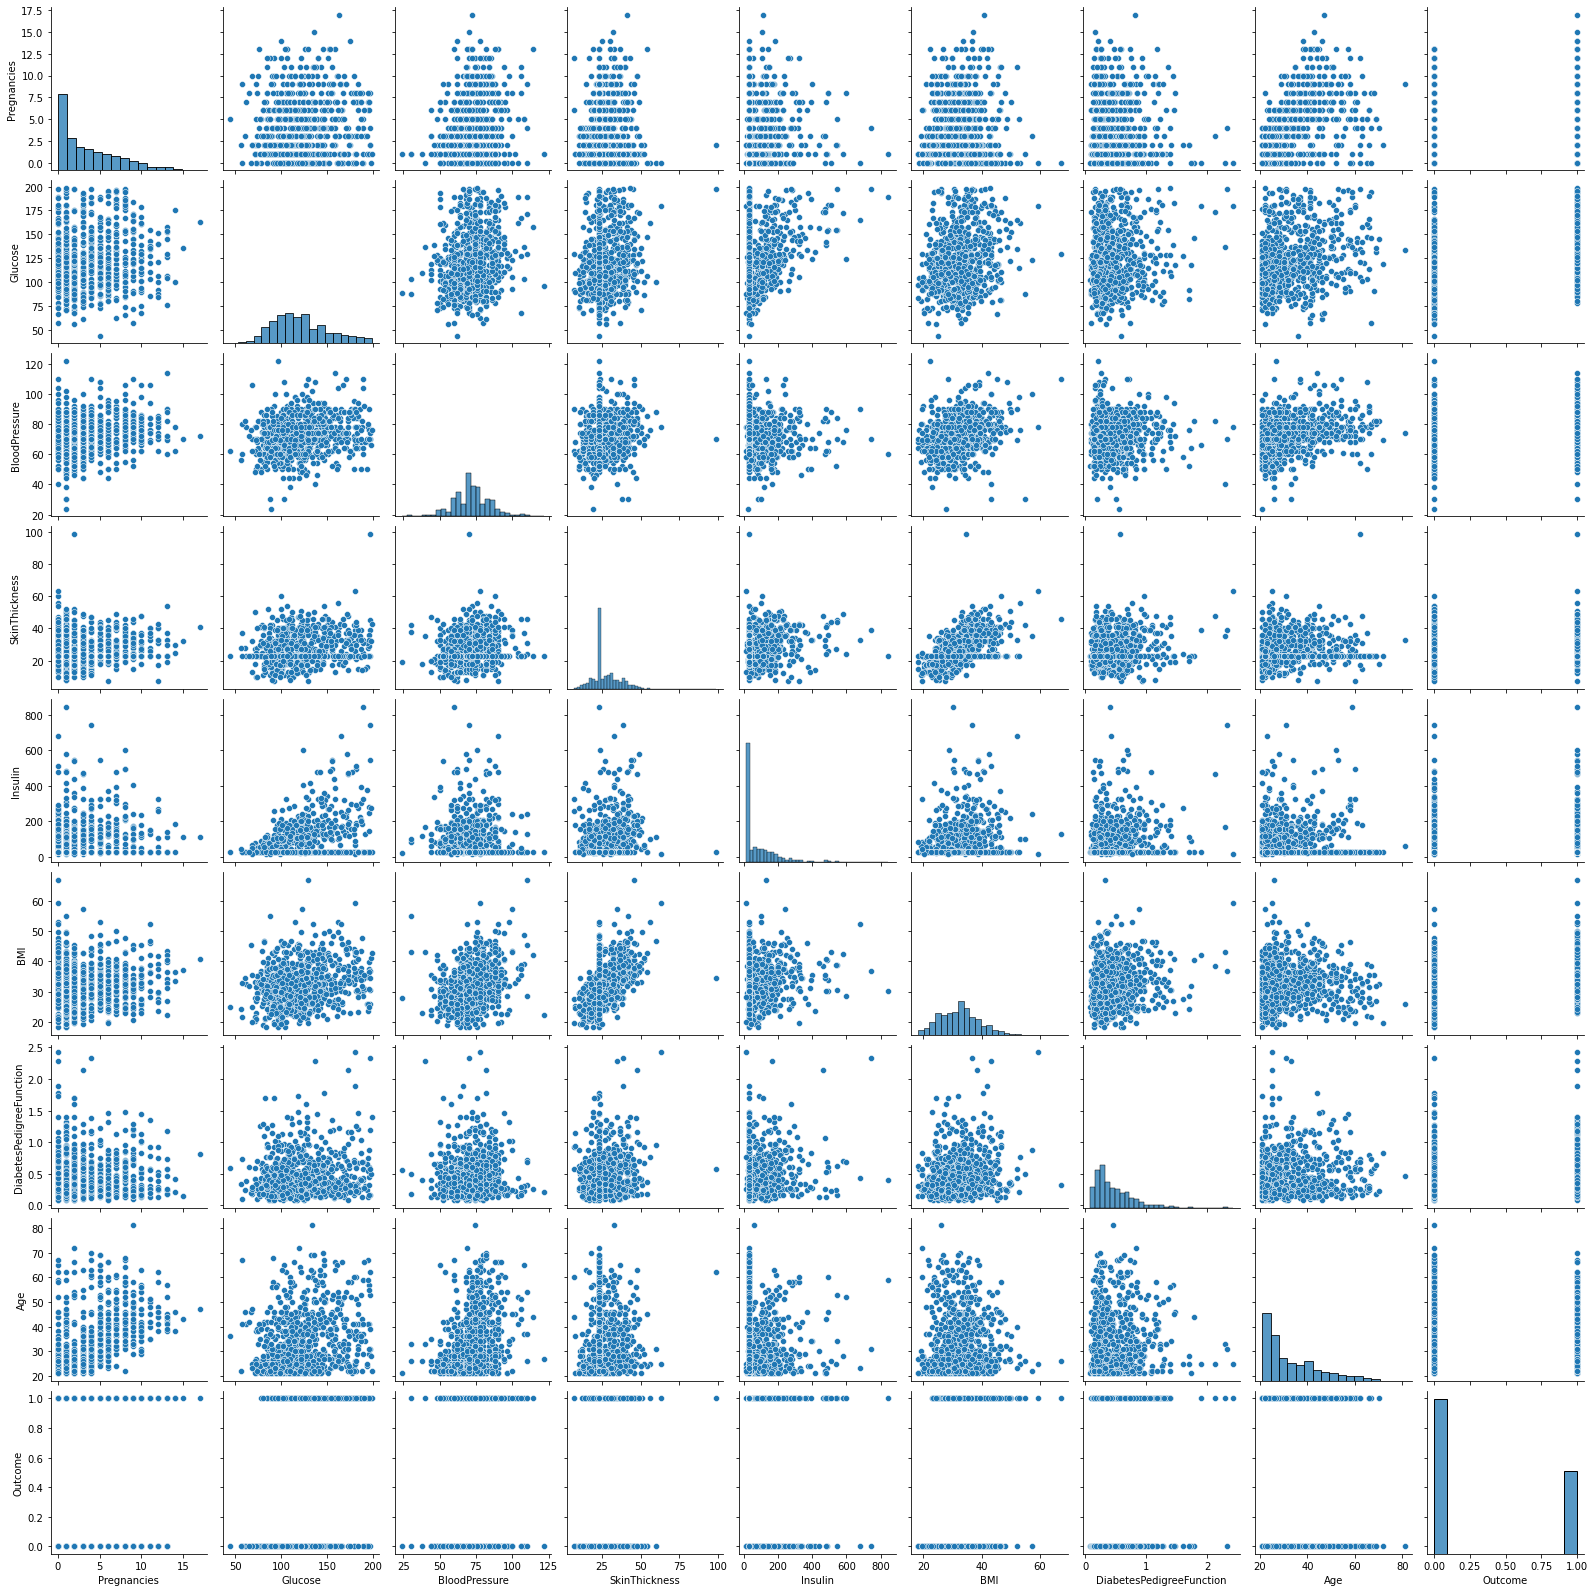

In [16]:
sns_plot = sns.pairplot(data)
plt.savefig("output1.png")

### Now let's visualize the correlation with the data.

In [17]:
corr_df = data.corr()
corr_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.172361,0.357081,0.231469,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.152458,-0.022049,0.281232,0.000371,0.326740,0.162986
SkinThickness,0.032568,0.172361,0.152458,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357081,-0.022049,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231469,0.281232,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


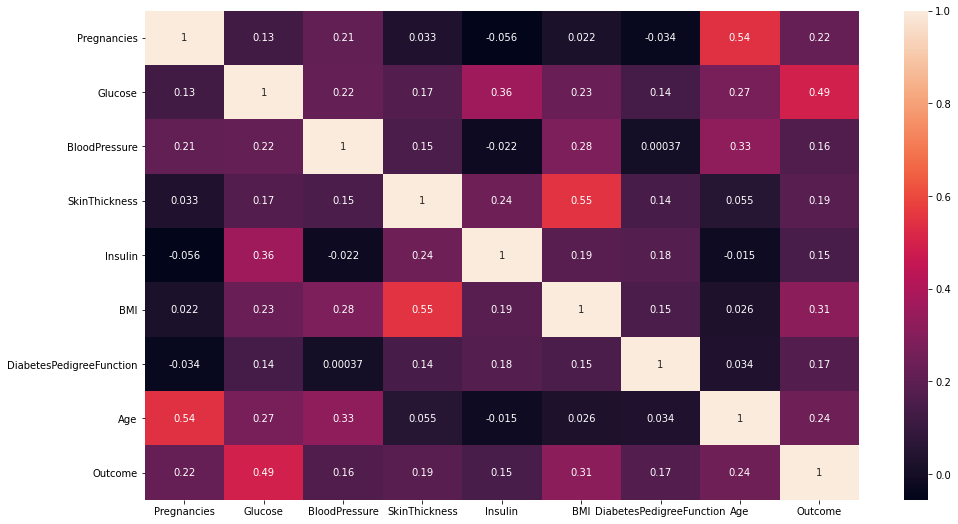

In [18]:
plt.figure(figsize=(16,9))
sns.heatmap(corr_df, annot = True);

#### Observe the last row 'Outcome' and note its correlation scores with different features. We can observe that Glucose, BMI and Age are the most correlated with Outcome. BloodPressure, Insulin, DiabetesPedigreeFunction are the least correlated, hence they don't contribute much to the model so we can drop them.

In [19]:
data_selected=data.drop(['BloodPressure','Insulin','DiabetesPedigreeFunction'],axis='columns')

In [20]:
from sklearn.preprocessing import QuantileTransformer
x=data_selected
quantile  = QuantileTransformer()
X = quantile.fit_transform(x)
data_new=quantile.transform(X)
data_new=pd.DataFrame(X)
data_new.columns =['Pregnancies', 'Glucose','SkinThickness','BMI','Age','Outcome']
data_new.head()

,Pregnancies,Glucose,SkinThickness,BMI,Age,Outcome
0,0.747718,0.810300,0.801825,0.591265,0.889831,1.0
1,0.232725,0.091265,0.644720,0.213168,0.558670,0.0
2,0.863755,0.956975,0.357888,0.077575,0.585398,1.0
3,0.232725,0.124511,0.357888,0.284224,0.000000,0.0
4,0.000000,0.721643,0.801825,0.926988,0.606258,1.0


<AxesSubplot:xlabel='SkinThickness'>

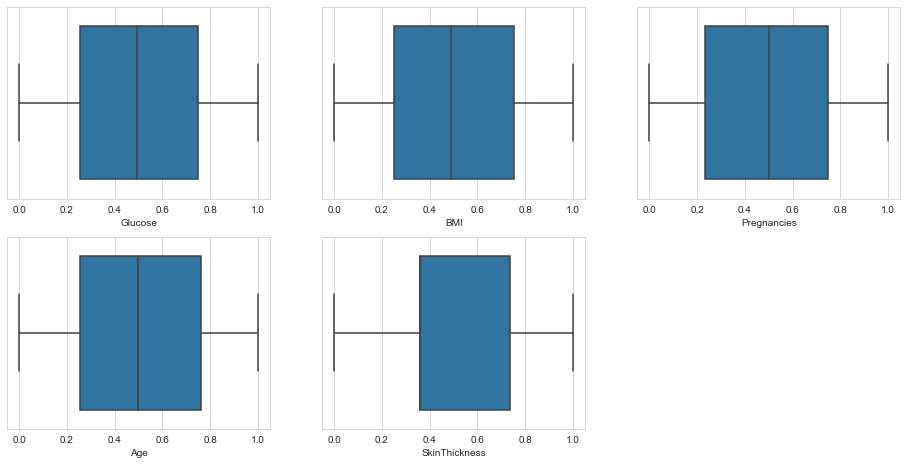

In [21]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x=data_new['Glucose'],data=data_new)
plt.subplot(3,3,2)
sns.boxplot(x=data_new['BMI'],data=data_new)
plt.subplot(3,3,3)
sns.boxplot(x=data_new['Pregnancies'],data=data_new)
plt.subplot(3,3,4)
sns.boxplot(x=data_new['Age'],data=data_new)
plt.subplot(3,3,5)
sns.boxplot(x=data_new['SkinThickness'],data=data_new)

#### Let's create a function to evaluate predictions and calculate accuracy.

In [22]:
def evaluate(true,pred):
    
    cm = confusion_matrix(y_test, y_pred)
    c_reprt = classification_report(y_test, y_pred)
    acc_score = accuracy_score(y_test, y_pred)
    
    
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n ",c_reprt)
    print("Accuracy Score:\n ",acc_score)

    sns.heatmap(cm, annot = True)

#### Preparing the data and splitting our data into training and test data sets.Using the training set to fit the model and the test set to evaluate our model's predictions.

In [23]:
X = data.drop(['Outcome'], axis = 1)
y = data['Outcome']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [25]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [26]:
X_test.shape,y_test.shape

((154, 8), (154,))

#### Creating a logistic regression model using scikit-learn's LogisticRegression()

In [27]:
model = LogisticRegression(solver = 'liblinear')

In [28]:
model.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [29]:
y_pred = model.predict(X_test)

Confusion Matrix:
 [[94 13]
 [22 25]]
Classification Report:
                precision    recall  f1-score   support

           0       0.81      0.88      0.84       107
           1       0.66      0.53      0.59        47

    accuracy                           0.77       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.76      0.77      0.77       154

Accuracy Score:
  0.7727272727272727


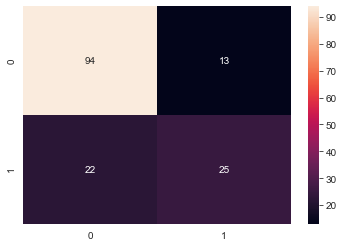

In [30]:
evaluate(y_test, y_pred)

### PR Curve

In [31]:
from sklearn.metrics import precision_recall_curve

In [32]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

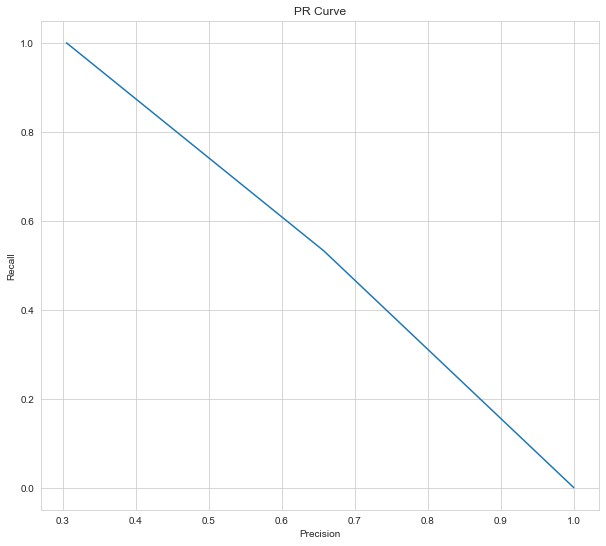

In [33]:
plt.figure(figsize = (10,9))
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title('PR Curve')
plt.show()

### ROC Curve

In [34]:
from sklearn.metrics import roc_curve

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

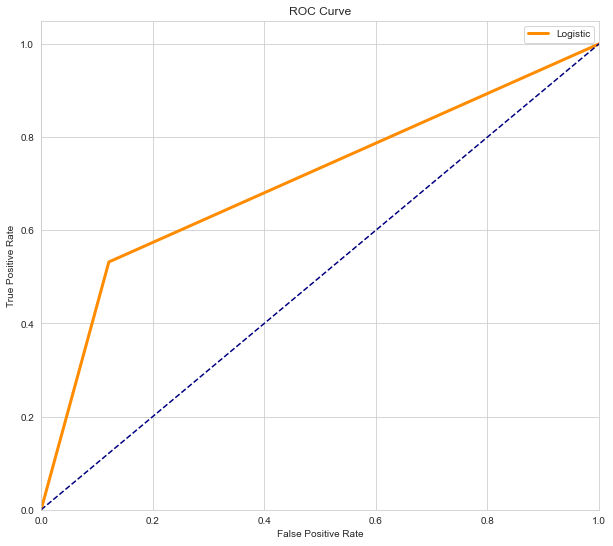

In [36]:
plt.figure(figsize = (10,9))

plt.plot(fpr, tpr, color = 'darkorange', label = 'Logistic', lw = 3)
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')

plt.axis([0 ,1 ,0 ,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.title('ROC Curve')
plt.show()

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model = DecisionTreeClassifier()

In [39]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [40]:
y_pred = model.predict(X_test)

Confusion Matrix:
 [[88 19]
 [13 34]]
Classification Report:
                precision    recall  f1-score   support

           0       0.87      0.82      0.85       107
           1       0.64      0.72      0.68        47

    accuracy                           0.79       154
   macro avg       0.76      0.77      0.76       154
weighted avg       0.80      0.79      0.80       154

Accuracy Score:
  0.7922077922077922


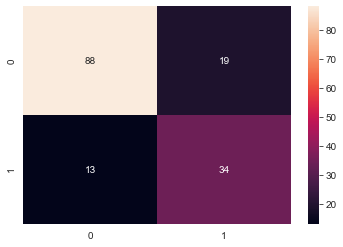

In [41]:
evaluate(y_test, y_pred)

In [42]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

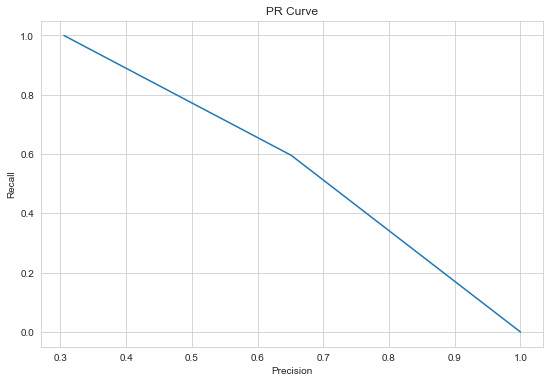

In [55]:
plt.figure(figsize = (9,6))
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title('PR Curve')
plt.show()

In [44]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

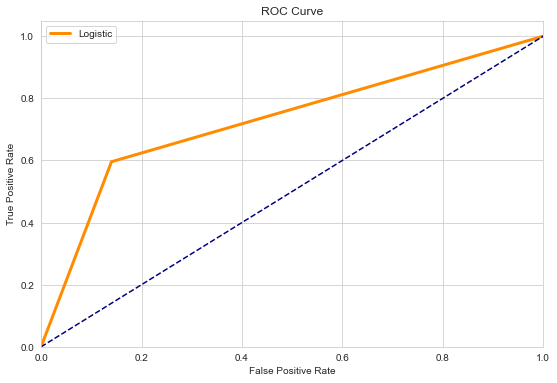

In [56]:
plt.figure(figsize = (9,6))

plt.plot(fpr, tpr, color = 'darkorange', label = 'Logistic', lw = 3)
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')

plt.axis([0 ,1 ,0 ,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.title('ROC Curve')
plt.show()

In [46]:
from sklearn.naive_bayes import GaussianNB

In [47]:
model = GaussianNB()

In [48]:
model.fit(X_train,y_train)

GaussianNB()

In [49]:
y_pred = model.predict(X_test)

Confusion Matrix:
 [[92 15]
 [19 28]]
Classification Report:
                precision    recall  f1-score   support

           0       0.83      0.86      0.84       107
           1       0.65      0.60      0.62        47

    accuracy                           0.78       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.77      0.78      0.78       154

Accuracy Score:
  0.7792207792207793


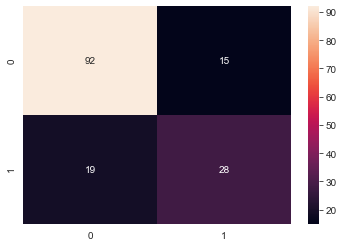

In [50]:
evaluate(y_test, y_pred)

In [51]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

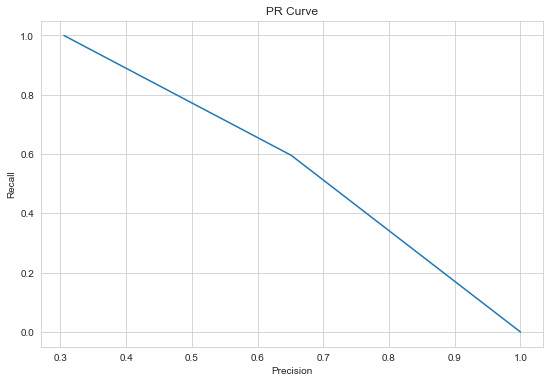

In [57]:
plt.figure(figsize = (9,6))
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title('PR Curve')
plt.show()

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

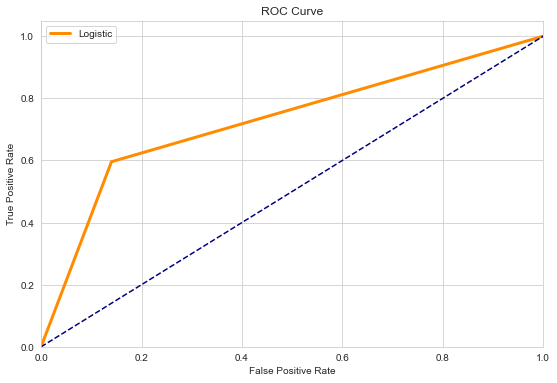

In [58]:
plt.figure(figsize = (9,6))

plt.plot(fpr, tpr, color = 'darkorange', label = 'Logistic', lw = 3)
plt.plot([0,1], [0,1], color = 'navy', linestyle = '--')

plt.axis([0 ,1 ,0 ,1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.legend()

plt.title('ROC Curve')
plt.show()